# Heading 1

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import statsmodels.api as sm
import sys
%pylab inline
print('python', sys.version)
print('pandas', pd.__version__)
#print 'statsmodels', sm.version.full_version

Populating the interactive namespace from numpy and matplotlib
python 3.4.1 (default, May 19 2014, 13:10:29) 
[GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
pandas 0.16.0


`%matplotlib` prevents importing * from pylab and numpy


In [45]:
ss = pd.read_csv('saosilvestre.csv')

In [8]:
ss.head()

,nome,pais,corrida,ano,horario,tempo,percurso,largada,chegada
0,Dawit Admasu,Etiópia,90,2014,09:00:00,00:45:04.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
1,Ymer Wude Ayalew,Etiópia,90,2013,08:40:00,00:50:43.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
2,Edwin Kipsang,Quênia,89,2013,09:00:00,00:43:47.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
3,Nancy Kipron,Quênia,89,2013,08:40:00,00:51:58.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
4,Edwin Kipsang,Quênia,88,2012,09:00:00,00:44:05.000,15000,"Av. Paulista, próximo à Rua Frei Caneca.","Av. Paulista, 900, em frente ao Edifício da Fu..."


In [46]:
ss.ix[ss.corrida == 90, 'ano'] = 2014

In [20]:
ss.head()

,nome,pais,corrida,ano,horario,tempo,percurso,largada,chegada
0,Dawit Admasu,Etiópia,90,2014,09:00:00,00:45:04.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
1,Ymer Wude Ayalew,Etiópia,90,2014,08:40:00,00:50:43.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
2,Edwin Kipsang,Quênia,89,2013,09:00:00,00:43:47.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
3,Nancy Kipron,Quênia,89,2013,08:40:00,00:51:58.000,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu..."
4,Edwin Kipsang,Quênia,88,2012,09:00:00,00:44:05.000,15000,"Av. Paulista, próximo à Rua Frei Caneca.","Av. Paulista, 900, em frente ao Edifício da Fu..."


In [23]:
ss.dtypes

nome        object
pais        object
corrida      int64
ano          int64
horario     object
tempo       object
percurso     int64
largada     object
chegada     object
dtype: object

In [47]:
ss['tempo'] = pd.to_timedelta(ss['tempo'])

In [35]:
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario              object
tempo       timedelta64[ns]
percurso              int64
largada              object
chegada              object
dtype: object

In [48]:
hr = ss.apply(lambda x: '%s-12-31 %s' % (x['ano'], x['horario']), axis=1)
ss['horario'] = pd.to_datetime(hr)
# ss['horario'] = pd.to_datetime(ss['ano'].map(str) + "-12-31 " + ss['horario'])

In [49]:
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
largada              object
chegada              object
dtype: object

In [57]:
ss['data'] = ss.apply(lambda x: datetime.datetime(x['ano'], 12, 31), axis=1)

In [58]:
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
largada              object
chegada              object
data         datetime64[ns]
dtype: object

In [60]:
ss['pace'] = 1000*ss['tempo']/ss['percurso']

In [61]:
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
largada              object
chegada              object
data         datetime64[ns]
pace        timedelta64[ns]
dtype: object

In [79]:
ss_sexo = ss_ano.apply(lambda x: 'masculino' if len(x) == 1 else ['masculino', 'feminino'])

In [110]:
# [item for sublist in ss_sexo.tolist() for item in sublist]
def flatten(x, l):
    if type(x) is list:
        for e in x:
            flatten(e, l)
    else:
        l.append(x)

l = []
flatten(ss_sexo.tolist(), l)

ss['sexo'] = l

In [112]:
ss.tail()

,nome,pais,corrida,ano,horario,tempo,percurso,largada,chegada,data,pace,sexo
5,Maurine Kipchumba,Quênia,88,2012,2012-12-31 08:40:00,00:51:42,15000,"Av. Paulista, próximo à Rua Frei Caneca.","Av. Paulista, 900, em frente ao Edifício da Fu...",2012-12-31,00:03:26.800000,feminino
2,Edwin Kipsang,Quênia,89,2013,2013-12-31 09:00:00,00:43:47,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu...",2013-12-31,00:02:55.133333,masculino
3,Nancy Kipron,Quênia,89,2013,2013-12-31 08:40:00,00:51:58,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu...",2013-12-31,00:03:27.866666,feminino
0,Dawit Admasu,Etiópia,90,2014,2014-12-31 09:00:00,00:45:04,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu...",2014-12-31,00:03:00.266666,masculino
1,Ymer Wude Ayalew,Etiópia,90,2014,2014-12-31 08:40:00,00:50:43,15000,"Av. Paulista, próximo à Rua Ministro Rocha Aze...","Av. Paulista, 900, em frente ao Edifício da Fu...",2014-12-31,00:03:22.866666,feminino


In [122]:
ss.ix[ss['pais'].isnull(), 'pais'] = 'Brasil'

In [128]:
ss.ix[ss['pais'].map(lambda x: x[0] == '-'), 'pais'] = ['Quênia', 'Brasil']

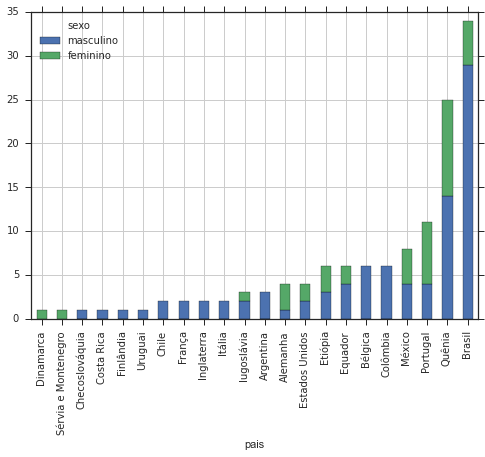

In [297]:
ss_pais = ss.groupby(['pais', 'sexo'])
ss_pais_sexo = ss_pais.sexo.count().unstack().fillna(0)
ss_pais_sexo['total'] = ss_pais_sexo.masculino + ss_pais_sexo.feminino
ss_pais_sexo = ss_pais_sexo.sort(['total', 'masculino'])
ss_pais_sexo[['masculino', 'feminino']].plot(kind='bar', stacked=True);


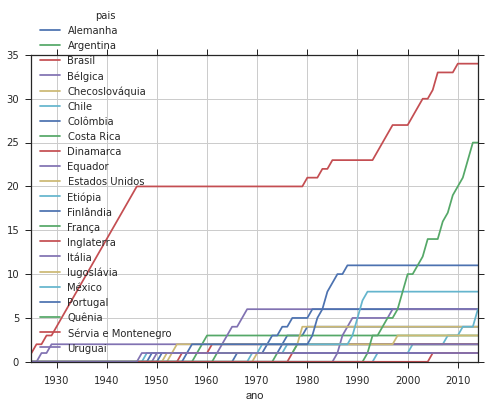

In [302]:
ss_pais_c = ss.groupby(['ano', 'pais']).corrida.count()
ss_pais_c.unstack().fillna(0).cumsum().plot();

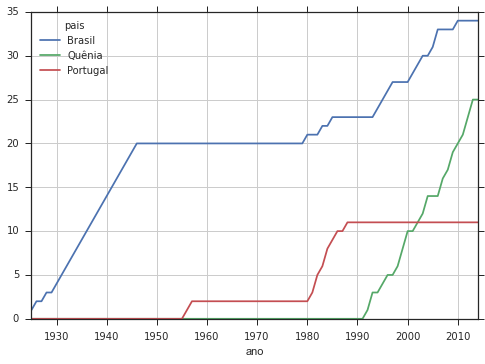

In [312]:
ss_pais_c.unstack()[['Brasil', 'Quênia', 'Portugal']].fillna(0).cumsum().plot();

In [141]:
ss.ix[ss.pace > datetime.timedelta(0, 4*60), 'percurso'] = 15000
ss['pace'] = 1000*ss['tempo']/ss['percurso']

In [324]:
ss_camp = ss.groupby(['nome', 'sexo']).corrida.count().unstack().fillna(0)
ss_camp.sort(['masculino', 'feminino'])

sexo,feminino,masculino
nome,,
Aurora Cunha,1,0
Carmen Oliveira,1,0
Derartu Tulu,1,0
Heide Hutterer,1,0
Hellen Kimayio,1,0
Loa Olafsson,1,0
Lucélia Peres,1,0
Margaret Okayo,1,0
Maria Luisa Servin,1,0


In [331]:
ss_camp = ss.groupby(['nome'])
ss_camp.agg({'nome': 'count', 'sexo': 'max'}).sort(['nome', 'sexo'])
# .corrida.count().unstack().fillna(0)
# ss_camp.sort(['masculino', 'feminino'])

,sexo,nome
nome,,
Aurora Cunha,feminino,1
Carmen Oliveira,feminino,1
Derartu Tulu,feminino,1
Heide Hutterer,feminino,1
Hellen Kimayio,feminino,1
Loa Olafsson,feminino,1
Lucélia Peres,feminino,1
Margaret Okayo,feminino,1
Maria Luisa Servin,feminino,1


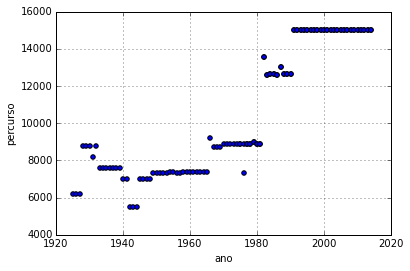

In [179]:
ss.plot(x='ano', y='percurso', kind='scatter');

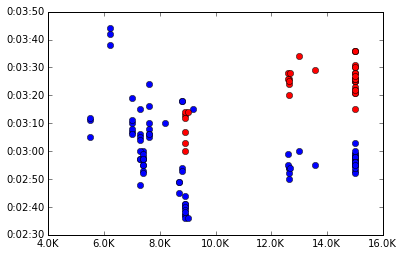

In [177]:
ss_pace = ss.ix[:,['sexo', 'ano', 'pace', 'percurso']]
ss_pace['pace'] = ss_pace.pace.astype('timedelta64[s]')

fig = plt.figure()
ax = fig.add_subplot(111)

masc = ss_pace.query('sexo == "masculino"')
ax.plot(masc.percurso, masc.pace, 'bo')
fem = ss_pace.query('sexo == "feminino"')
ax.plot(fem.percurso, fem.pace, 'ro')

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)

def distTicks(x, pos):
    return str(x/1000) + 'K'

pace_formatter = matplotlib.ticker.FuncFormatter(timeTicks)
dist_formatter = matplotlib.ticker.FuncFormatter(distTicks)
ax.xaxis.set_major_formatter(dist_formatter)
ax.yaxis.set_major_formatter(pace_formatter)

plt.show()

In [222]:
ss_long = ss.query('percurso > 12000')
ss_long.ix[:,'pace'] = ss_long['pace'].astype('timedelta64[s]')

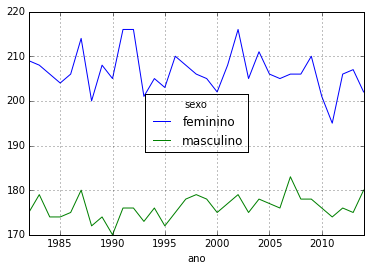

In [236]:
ss_long_sexo = ss_long.groupby(['ano', 'sexo'])
ss_long_sexo = ss_long_sexo.pace.max().unstack()
ss_long_sexo.plot();

In [244]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
temp = pd.read_csv('temperatura.csv', parse_dates=['Data'], date_parser=dateparse)
print(temp.dtypes)
temp.head()

Data                    datetime64[ns]
TempMaximaMedia                float64
TempCompensadaMedia            float64
TempMinimaMedia                float64
UmidadeRelativaMedia           float64
dtype: object


,Data,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia
0,1961-12-31,27.177419,20.721290,17.083871,81.185484
1,1962-12-31,24.483871,19.985161,17.106452,87.024194
2,1963-12-31,26.806452,20.597419,16.641935,75.088710
3,1964-12-31,24.516129,19.642581,16.338710,83.532258
4,1965-12-31,26.412903,21.985161,19.000000,81.612903


nome                             object
pais                             object
corrida                           int64
ano                               int64
horario                  datetime64[ns]
tempo                   timedelta64[ns]
percurso                          int64
largada                          object
chegada                          object
data                     datetime64[ns]
pace                            float64
sexo                             object
Data                     datetime64[ns]
TempMaximaMedia                 float64
TempCompensadaMedia             float64
TempMinimaMedia                 float64
UmidadeRelativaMedia            float64
dtype: object


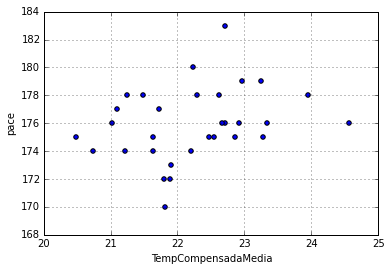

In [250]:
ss_long_masc = ss_long.query('sexo == "masculino"')
ss_temp = pd.merge(ss_long_masc, temp, left_on='data', right_on='Data')
print(ss_temp.dtypes)
ss_temp.plot(x='TempCompensadaMedia', y='pace', kind='scatter');

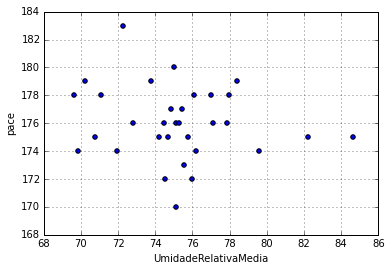

In [251]:
ss_temp.plot(x='UmidadeRelativaMedia', y='pace', kind='scatter');

In [254]:
import statsmodels.api as sm

In [255]:
X = ss_temp.TempCompensadaMedia
X = sm.add_constant(X)
y = ss_temp.pace

In [258]:
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.562
Date:                Sun, 29 Mar 2015   Prob (F-statistic):              0.120
Time:                        09:20:49   Log-Likelihood:                -71.869
No. Observations:                  31   AIC:                             147.7
Df Residuals:                      29   BIC:                             150.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 158.2899    

In [259]:
X = ss_temp.UmidadeRelativaMedia
X = sm.add_constant(X)
y = ss_temp.pace

In [272]:
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8682
Date:                Sun, 29 Mar 2015   Prob (F-statistic):              0.359
Time:                        10:39:22   Log-Likelihood:                -75.276
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      30   BIC:                             157.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  185.9603 

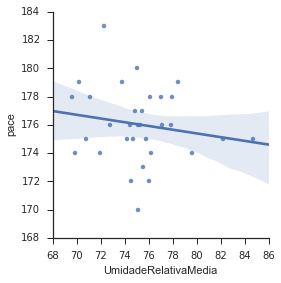

In [277]:
import seaborn as sns
sns.set(style="ticks")

sns.lmplot("UmidadeRelativaMedia", "pace", data=ss_temp,
           palette="muted", size=4)

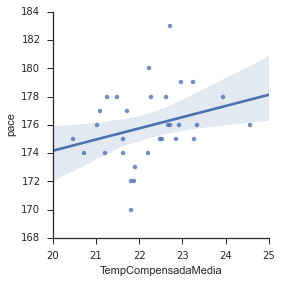

In [278]:
sns.lmplot("TempCompensadaMedia", "pace", data=ss_temp,
           palette="muted", size=4)

In [311]:
mod = sm.RLM(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   pace   No. Observations:                   32
Model:                            RLM   Df Residuals:                       30
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 29 Mar 2015                                         
Time:                        16:31:03                                         
No. Iterations:                    11                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  183.8189 